In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

C:\Users\joseg\AppData\Local\Temp\ipykernel_8792\4009471858.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [38]:
df1= pd.read_csv('C:/Users/joseg/Downloads/archive/results.csv')
df1.notnull().count()/df1.shape[0]


date          1.0
home_team     1.0
away_team     1.0
home_score    1.0
away_score    1.0
tournament    1.0
city          1.0
country       1.0
neutral       1.0
dtype: float64

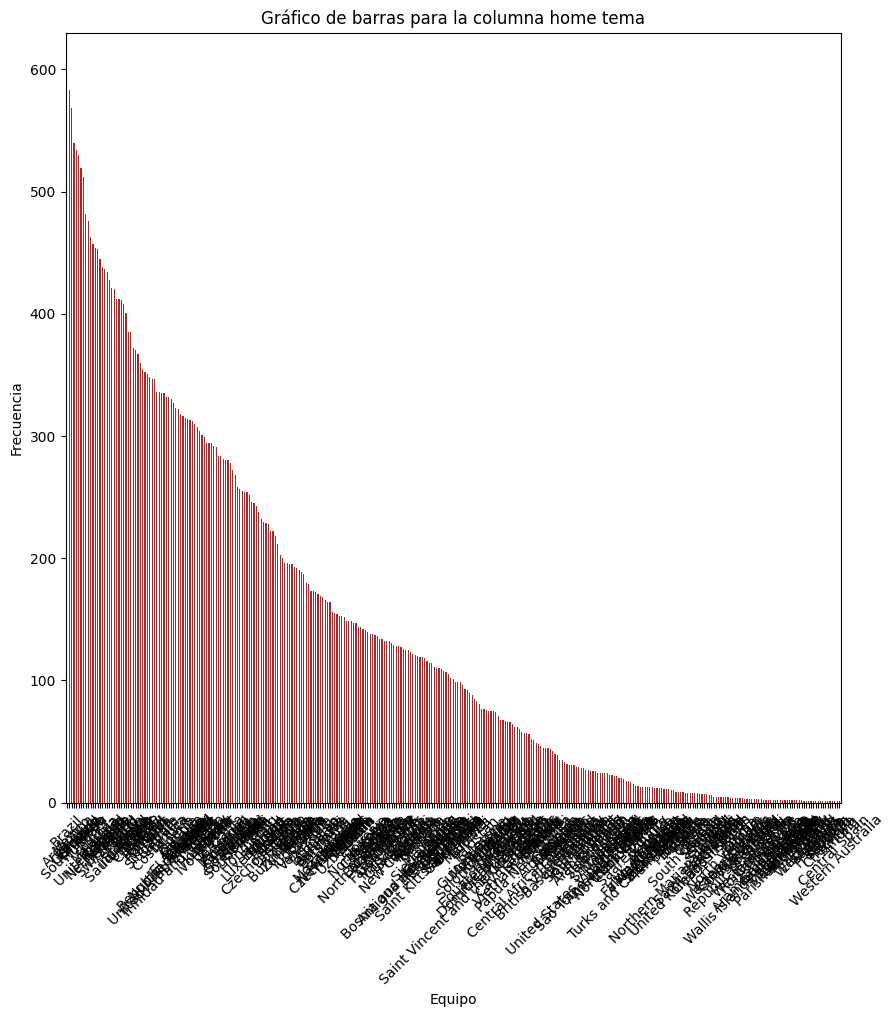

In [54]:
counts = df1['home_team'].value_counts()
counts.plot.bar(figsize=(10,10), color='firebrick')
plt.title('Gráfico de barras para la columna home tema')
plt.xlabel('Equipo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x si es necesario
plt.show()

In [39]:
df1.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [13]:
df1[].columns

Index(['date', 'home_team', 'away_team', 'team', 'scorer', 'minute',
       'own_goal', 'penalty'],
      dtype='object')

In [45]:
from scipy.stats import zscore
z_scores = df1[['home_score', 'away_score']].apply(zscore)
z_scores

,home_score,away_score
0,-0.992914,-0.845932
1,1.272876,0.582751
2,0.139981,-0.131590
3,0.139981,0.582751
4,0.706429,-0.845932
...,...,...
46284,-0.426466,-0.845932
46285,-0.426466,-0.131590
46286,0.706429,-0.131590
46287,-0.992914,-0.845932


In [64]:
mask_z = (z_scores > -3) & (z_scores < 3)
mask_z

,home_score,away_score
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
...,...,...
46284,True,True
46285,True,True
46286,True,True
46287,True,True


In [62]:
len(df1), len(df1[mask_z.all(axis=1)])

(46289, 41930)

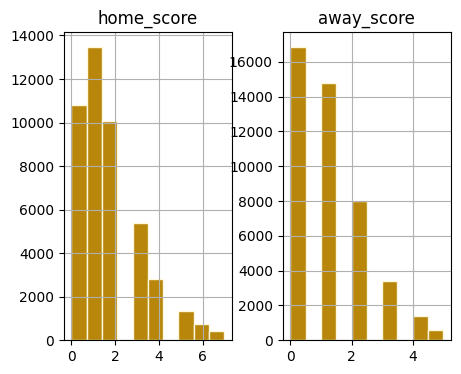

In [67]:
df1[mask_z.all(axis=1)].hist(figsize=(5,4), color='darkgoldenrod', edgecolor='cornsilk');   

#df1[mask_z.all(axis=1)] lo que hace este comando es que selecciona las filas del DataFrame df1 
#donde todas las condiciones especificadas en la mascara: mask_z sean verdaderas a lo largo del eje de las columnas
#Ya que axis=1, son las columnas del df.
